In [ ]:
import pandas as pd

df = pd.read_csv('prepared_data_book.csv',
                )
df.head()

,Unnamed: 0,product_id,title,authors,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer,cover_link,discount
0,0,74021317,Cây Cam Ngọt Của Tôi,José Mauro de Vasconcelos,4.56,2.73,53075,Tiểu Thuyết,11481,5.0,244,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/5e/18/24/2...,0.4
1,2,184466860,Hành Tinh Của Một Kẻ Nghĩ Nhiều,Nguyễn Đoàn Minh Thư,3.63,2.53,7929,Others,780,4.8,184,Nhà Xuất Bản Thế Giới,https://salt.tikicdn.com/ts/product/d7/99/24/1...,0.3
2,3,73787185,Những Tù Nhân Của Địa Lý,Tim Marshall,8.86,5.32,17896,Lĩnh vực khác,3623,4.8,430,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/8d/96/9e/c...,0.4
3,4,52789367,Nhà Giả Kim (Tái Bản 2020),Paulo Coelho,3.33,2.00,24668,Tác phẩm kinh điển,5131,5.0,228,Nhà Xuất Bản Hà Nội,https://salt.tikicdn.com/ts/product/45/3b/fc/a...,0.4
4,5,147920903,Một Thoáng Ta Rực Rỡ Ở Nhân Gian,Unknown,5.70,3.42,10000,Tiểu Thuyết,1636,4.8,304,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/2f/b5/4e/a...,0.4


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load dataset
data = pd.read_csv('prepared_data_book.csv')

# Bỏ các trường dữ liệu không cần thiết
data.drop(columns=['Unnamed: 0', 'product_id', 'title', 'cover_link'], inplace=True)

# Bỏ các giá trị bị thiếu
data.dropna(inplace=True)

# Encode các biến categorical thành numeric
label_encoder = LabelEncoder()
data['category_encoded'] = label_encoder.fit_transform(data['category'])
data['manufacturer_encoded'] = label_encoder.fit_transform(data['manufacturer'])
data['authors_encoded'] = label_encoder.fit_transform(data['authors'])

# Vì đã encode nên ta sẽ bỏ đi các cột dữ liệu cũ
data.drop(columns=['category', 'manufacturer', 'authors'], inplace=True)


Mean Squared Error: 1.1482770391515056
R-squared: 0.0676452042381217


In [ ]:
# Split data thành dữ liệu x và target y
X = data.drop(columns=['avg_rating'])
y = data['avg_rating']

# Chia thành tập train và tập test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ở phần mở đầu này ta sẽ dùng hồi quy tuyến tính ( linear regression)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Khởi tạo mô hình
model = LinearRegression()

# Huấn luyện
model.fit(X_train, y_train)

# Đánh giá
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 1.1482770391515056
R-squared: 0.0676452042381217


In [ ]:
# cài đặt tensorflow và các thư viện khác

!pip install tensorflow


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
# Các bước ở trên ta sẽ làm tương tự như với mô hình hồi quy tuyến tính

data = pd.read_csv('prepared_data_book.csv')

data.drop(columns=['Unnamed: 0', 'product_id', 'title', 'cover_link'], inplace=True)

data.dropna(inplace=True)


label_encoder = LabelEncoder()
data['category_encoded'] = label_encoder.fit_transform(data['category'])
data['manufacturer_encoded'] = label_encoder.fit_transform(data['manufacturer'])
data['authors_encoded'] = label_encoder.fit_transform(data['authors'])


data.drop(columns=['category', 'manufacturer', 'authors'], inplace=True)




In [ ]:
# Chia data thành đặc trưng x và mục tiêu y
X = data.drop(columns=['avg_rating'])
y = data['avg_rating']

# Chia thành tập train và tập test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale lại các đặc trưng
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Xây dựng mạng neural
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(8, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1)
])


model.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/50
36/36 [==============================] - 2s 9ms/step - loss: 16.6936 - val_loss: 7.2216
Epoch 2/50
36/36 [==============================] - 0s 5ms/step - loss: 8.5499 - val_loss: 4.3572
Epoch 3/50
36/36 [==============================] - 0s 4ms/step - loss: 7.6588 - val_loss: 3.8129
Epoch 4/50
36/36 [==============================] - 0s 4ms/step - loss: 6.1707 - val_loss: 3.4534
Epoch 5/50
36/36 [==============================] - 0s 4ms/step - loss: 5.9797 - val_loss: 3.1219
Epoch 6/50
36/36 [==============================] - 0s 5ms/step - loss: 5.7062 - val_loss: 2.8880
Epoch 7/50
36/36 [==============================] - 0s 4ms/step - loss: 5.6227 - val_loss: 3.1939
Epoch 8/50
36/36 [==============================] - 0s 5ms/step - loss: 4.9911 - val_loss: 2.7542
Epoch 9/50
36/36 [==============================] - 0s 5ms/step - loss: 5.0667 - val_loss: 2.3569
Epoch 10/50
36/36 [==============================] - 0s 5ms/step - loss: 4.6334 - val_loss: 2.0620
Epoch 11/50
36/36 

In [ ]:
# Đánh giá mô hình trên tập test
mse = model.evaluate(X_test, y_test)
print("Mean Squared Error:", mse)


12/12 [==============================] - 0s 2ms/step - loss: 1.1870
Mean Squared Error: 1.1870346069335938


In [ ]:
import matplotlib.pyplot as plt

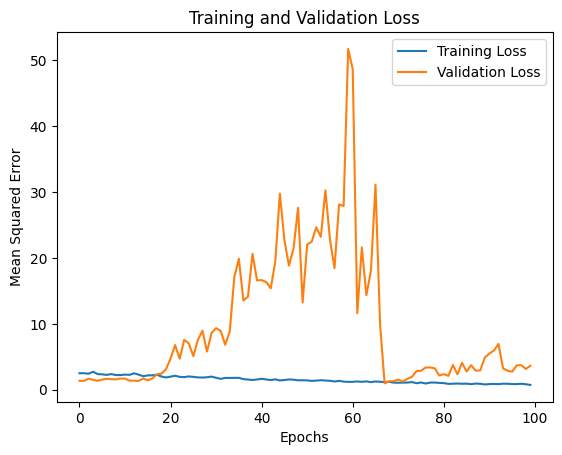

In [ ]:
# Sau đó biểu diễn mất mát của tập train và tập val sau từng epoch
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

12/12 [==============================] - 0s 2ms/step


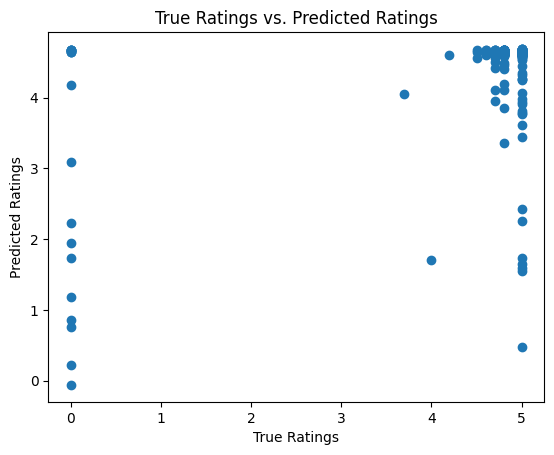

In [ ]:
# Dự đoán rating thực tế với rating dự đoán
y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel('True Ratings')
plt.ylabel('Predicted Ratings')
plt.title('True Ratings vs. Predicted Ratings')
plt.show()


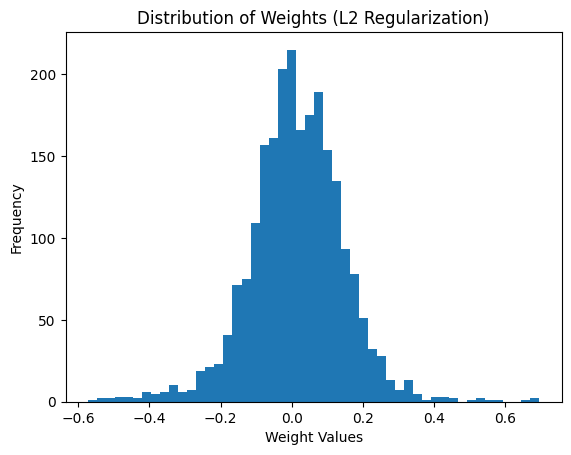

In [ ]:
# Nếu sử dụng chuẩn hóa L2, đây là các giá trị trọng số cho lớp đầu tiên
weights = model.layers[0].get_weights()[0]
plt.hist(weights.flatten(), bins=50)
plt.xlabel('Weight Values')
plt.ylabel('Frequency')
plt.title('Distribution of Weights (L2 Regularization)')
plt.show()

